In [2]:
import warnings
warnings.filterwarnings("ignore")
import time
import random
from math import *
import operator
import pandas as pd
import numpy as np

# import plotting libraries
import matplotlib
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
%matplotlib inline 

import seaborn as sns
sns.set(style="white", color_codes=True)
sns.set(font_scale=1.5)

# load make_blobs to simulate data
from sklearn.datasets import make_blobs
from sklearn.datasets import make_classification

# import the ML algorithm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from statsmodels.tools.eval_measures import rmse
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# pre-processing
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import scale
from sklearn.preprocessing import minmax_scale
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import Normalizer
#from sklearn.preprocessing.data import QuantileTransformer
#from sklearn.preprocessing import Imputer
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

# import libraries for model validation
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import LeaveOneOut 

# import libraries for metrics and reporting
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, auc

from sklearn.model_selection import GridSearchCV

In [3]:
location = r"C:\Users\LENOVO\Desktop\Files\symbi\datasets-20220603T114254Z-001\datasets\breast-cancer-wisconsin.csv"

In [4]:
names = ['id_number', 'diagnosis', 'radius_mean', 
         'texture_mean', 'perimeter_mean', 'area_mean', 
         'smoothness_mean', 'compactness_mean', 
         'concavity_mean','concave_points_mean', 
         'symmetry_mean', 'fractal_dimension_mean',
         'radius_se', 'texture_se', 'perimeter_se', 
         'area_se', 'smoothness_se', 'compactness_se', 
         'concavity_se', 'concave_points_se', 
         'symmetry_se', 'fractal_dimension_se', 
         'radius_worst', 'texture_worst', 
         'perimeter_worst', 'area_worst', 
         'smoothness_worst', 'compactness_worst', 
         'concavity_worst', 'concave_points_worst', 
         'symmetry_worst', 'fractal_dimension_worst'] 

dx = ['Benign', 'Malignant']

In [5]:
# load the training data from breast cancer data set
breast_cancer = pd.read_csv(location, names=names)

In [6]:
breast_cancer.shape

(569, 32)

In [7]:
# examine the structure of data
breast_cancer.head()

,id_number,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


Cleaning
minor cleaning,

such as setting the id_number to the data frame index and
converting the diagnosis to the standard binary 1, 0 representation using the map() function.

In [8]:
# Setting 'id_number' as our index
breast_cancer.set_index(['id_number'], inplace = True)
# Converted to binary to help later on with models and plots
breast_cancer['diagnosis'] = breast_cancer['diagnosis'].map({'M':1, 'B':0})

In [9]:
breast_cancer.isnull().sum()

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave_points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave_points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave_points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [10]:
for col in breast_cancer:
    if ((breast_cancer[col].isnull().values.ravel().sum()) == 0):
        pass
    else:
        print(col)
        print((breast_cancer[col].isnull().values.ravel().sum()))
        
print('Sanity Check! No missing Values found!')

Sanity Check! No missing Values found!


In [11]:
names_index = names[2:]

In [12]:
print("Here's the dimensions of our data frame:\n",
     breast_cancer.shape)
print("Here's the data types of our columns:\n",
     breast_cancer.dtypes)

Here's the dimensions of our data frame:
 (569, 31)
Here's the data types of our columns:
 diagnosis                    int64
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave_points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave_points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64

In [13]:
def print_dx_perc(data_frame, col):
    """Function used to print class distribution for our data set"""
    
    dx_vals = data_frame[col].value_counts()
    dx_vals = dx_vals.reset_index()
    
    # Create a function to output the percentage
    f = lambda x, y: 100 * (x / sum(y))
    for i in range(0, len(dx)):
        print('{0} accounts for {1:.2f}% of the diagnosis class'\
          .format(dx[i], f(dx_vals[col].iloc[i],
                           dx_vals[col])))

In [14]:
print_dx_perc(breast_cancer, 'diagnosis')

Benign accounts for 62.74% of the diagnosis class
Malignant accounts for 37.26% of the diagnosis class


In [15]:
breast_cancer.diagnosis.value_counts()

0    357
1    212
Name: diagnosis, dtype: int64


Benign results account for 62.74% of the diagnosis class. Malignant results account for 37.26% of the diagnosis class. Fortunately, this data set does not suffer from class imbalance.

In [16]:
breast_cancer.describe()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,0.372583,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,0.483918,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,0.000000,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,0.000000,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,0.000000,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,1.000000,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,1.000000,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


Standardization is an important requirement for many classification models that should be handled when implementing pre-processing.

Some models (like neural networks) can perform poorly if pre-processing isn't considered, so the describe() function is a good indicator for standardization.

Fortunately, random forest does not require any pre-processing.

In [17]:
feature_space = breast_cancer.iloc[:, breast_cancer.columns != 'diagnosis']
feature_class = breast_cancer.iloc[:, breast_cancer.columns == 'diagnosis']

In [18]:
training_set, test_set, class_set, test_class_set = train_test_split(feature_space,
                                                                    feature_class,
                                                                    test_size = 0.20,
                                                                    random_state = 42)

In [19]:
class_set = class_set.values.ravel()
test_class_set = test_class_set.values.ravel()

In [20]:
fit_rf = RandomForestClassifier(random_state=42)

#### Hyperparameter Optimization

In [21]:
np.random.seed(42)
start = time.time()

param_dist = {'max_depth': [2, 3, 4],
              'bootstrap': [True, False],
              'max_features': ['auto', 'sqrt', 'log2', None],
              'criterion': ['gini', 'entropy']}

cv_rf = GridSearchCV(estimator=fit_rf, 
                     cv = 10,
                     param_grid=param_dist,
                     n_jobs = 1)

cv_rf.fit(training_set, class_set)

print('Best Parameters using grid search: \n',
      cv_rf.best_params_)

end = time.time()

print('Time taken in grid search: {0: .2f}'.format(end - start))

Best Parameters using grid search: 
 {'bootstrap': True, 'criterion': 'entropy', 'max_depth': 4, 'max_features': 'log2'}
Time taken in grid search:  67.56


In [22]:
# Set best parameters given by grid search
fit_rf.set_params(criterion = 'gini',
                  max_features = 'log2',
                  max_depth = 3)

RandomForestClassifier(max_depth=3, max_features='log2', random_state=42)

In [34]:
fit_rf.set_params(warm_start=False,
                  oob_score=True)

RandomForestClassifier(max_depth=3, max_features='log2', oob_score=True,
                       random_state=42)

In [35]:
min_estimators = 15
max_estimators = 100

In [36]:
error_rate={}

In [37]:
fit_rf.oob_score

True

In [38]:
fit_rf.oob_score_

0.9560439560439561

In [39]:
for i in range(min_estimators, max_estimators + 1):
    fit_rf.set_params(n_estimators=i)
    fit_rf.fit(training_set, class_set)

    # oob error rate
    oob_error = 1 - fit_rf.oob_score_
    error_rate[i] = oob_error

In [40]:
error_rate

{15: 0.05494505494505497,
 16: 0.05274725274725278,
 17: 0.0483516483516484,
 18: 0.03956043956043953,
 19: 0.0461538461538461,
 20: 0.05274725274725278,
 21: 0.0483516483516484,
 22: 0.0461538461538461,
 23: 0.05054945054945059,
 24: 0.0461538461538461,
 25: 0.0483516483516484,
 26: 0.05274725274725278,
 27: 0.05714285714285716,
 28: 0.04395604395604391,
 29: 0.04395604395604391,
 30: 0.0483516483516484,
 31: 0.0461538461538461,
 32: 0.0461538461538461,
 33: 0.0461538461538461,
 34: 0.05274725274725278,
 35: 0.05494505494505497,
 36: 0.05494505494505497,
 37: 0.05274725274725278,
 38: 0.05054945054945059,
 39: 0.05494505494505497,
 40: 0.05714285714285716,
 41: 0.05054945054945059,
 42: 0.05054945054945059,
 43: 0.0483516483516484,
 44: 0.05054945054945059,
 45: 0.0461538461538461,
 46: 0.0461538461538461,
 47: 0.0461538461538461,
 48: 0.0483516483516484,
 49: 0.0483516483516484,
 50: 0.0461538461538461,
 51: 0.0461538461538461,
 52: 0.0483516483516484,
 53: 0.0461538461538461,
 54: 0

In [41]:
# Convert dictionary to a pandas series for easy plotting
oob_series = pd.Series(error_rate)

Text(0.5, 1.0, 'OOB Error Rate Across various Forest sizes \n(From 15 to 100 trees)')

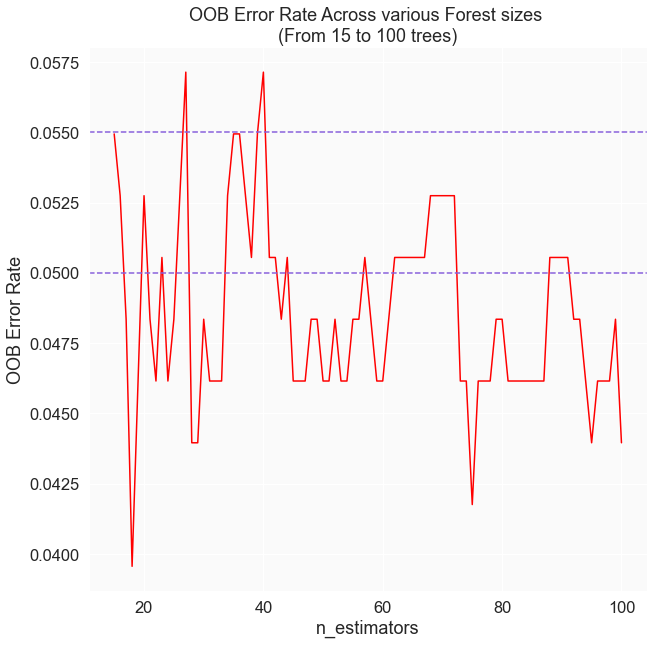

In [42]:
fig, ax = plt.subplots(figsize=(10, 10))

ax.set_facecolor('#fafafa')

oob_series.plot(kind='line',
                color = 'red')
plt.axhline(0.055,
            color='#875FDB',
           linestyle='--')
plt.axhline(0.05,
            color='#875FDB',
           linestyle='--')
plt.xlabel('n_estimators')
plt.ylabel('OOB Error Rate')
plt.title('OOB Error Rate Across various Forest sizes \n(From 15 to 100 trees)')

In [43]:
oob_series

15     0.054945
16     0.052747
17     0.048352
18     0.039560
19     0.046154
         ...   
96     0.046154
97     0.046154
98     0.046154
99     0.048352
100    0.043956
Length: 86, dtype: float64

In [44]:
print('OOB Error rate for 40 trees is: {0:.5f}'.format(oob_series[40]))

OOB Error rate for 40 trees is: 0.05714


In [45]:
fit_rf.set_params(n_estimators=400,
              bootstrap = True,
              warm_start=False,
              oob_score=False)

RandomForestClassifier(max_depth=3, max_features='log2', n_estimators=400,
                       random_state=42)


Training the Algorithm
Next, let's train the algorithm with the training and target class data sets we made earlier.

In [46]:
fit_rf.fit(training_set, class_set)

RandomForestClassifier(max_depth=3, max_features='log2', n_estimators=400,
                       random_state=42)

In [47]:
importances_rf = fit_rf.feature_importances_
indices_rf = np.argsort(importances_rf)[::-1]

In [48]:
def variable_importance(importance, indices):
    print("Feature ranking:")

    for f in range(len(names_index)):
        i = f
        print("%d. The feature '%s' \
has a Mean Decrease in Gini of %f" % (f + 1,
                                         names_index[indices[i]],
                                         importance[indices[f]]))

In [49]:
variable_importance(importances_rf, indices_rf)

Feature ranking:
1. The feature 'area_worst' has a Mean Decrease in Gini of 0.129856
2. The feature 'perimeter_worst' has a Mean Decrease in Gini of 0.120953
3. The feature 'concave_points_worst' has a Mean Decrease in Gini of 0.115548
4. The feature 'concave_points_mean' has a Mean Decrease in Gini of 0.100136
5. The feature 'radius_worst' has a Mean Decrease in Gini of 0.078047
6. The feature 'concavity_mean' has a Mean Decrease in Gini of 0.062143
7. The feature 'area_mean' has a Mean Decrease in Gini of 0.056556
8. The feature 'radius_mean' has a Mean Decrease in Gini of 0.054567
9. The feature 'perimeter_mean' has a Mean Decrease in Gini of 0.051745
10. The feature 'area_se' has a Mean Decrease in Gini of 0.043261
11. The feature 'concavity_worst' has a Mean Decrease in Gini of 0.038659
12. The feature 'compactness_worst' has a Mean Decrease in Gini of 0.020329
13. The feature 'compactness_mean' has a Mean Decrease in Gini of 0.016163
14. The feature 'texture_worst' has a Mean Dec

We can see here that our top 5 variables are

area_worst,
perimeter_worst,
concave_points_worst,
concave_points_mean,
radius_worst.
!!! This gives us great insight for further analyses like feature engineering

In [50]:
def variable_importance_plot(importance, indices):
    index = np.arange(len(names_index))

    importance_desc = sorted(importance)
    feature_space = []
    for i in range(29, -1, -1):
        feature_space.append(names_index[indices[i]])

    fig, ax = plt.subplots(figsize=(10, 10))

    ax.set_facecolor('#fafafa')
    plt.title('Feature importances for Random Forest Model\
    \nBreast Cancer (Diagnostic)')
    plt.barh(index,
         importance_desc,
         align="center",
         color = '#875FDB')
    plt.yticks(index,
           feature_space)

    plt.ylim(-1, 30)
    plt.xlim(0, max(importance_desc))
    plt.xlabel('Mean Decrease in Gini')
    plt.ylabel('Feature')

    plt.show()
    plt.close()

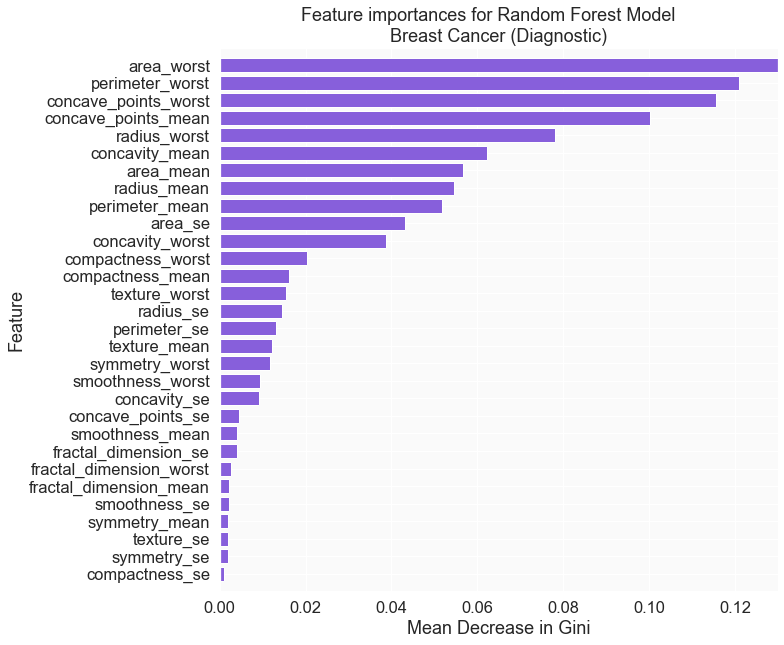

In [51]:
variable_importance_plot(importances_rf, indices_rf)

In [52]:
def cross_val_metrics(fit, training_set, class_set, print_results = True):
    n = KFold(n_splits=10)
    scores = cross_val_score(fit,
                     training_set,
                     class_set,
                     cv = n)
    if print_results:
        print("Accuracy: {0: 0.3f} (+/- {1: 0.3f})"\
          .format(scores.mean(), scores.std() / 2))
    else:
        return scores.mean(), scores.std() / 2

In [53]:
cross_val_metrics(fit_rf,
              training_set,
              class_set,
              print_results = True)

Accuracy:  0.947 (+/-  0.019)


In [54]:
#### Test Set Metrics

In [55]:
predictions_rf = fit_rf.predict(test_set)

In [56]:
test_crosstb = pd.crosstab(index = test_class_set,
                           columns = predictions_rf)

test_crosstb = test_crosstb.rename(columns= {0: 'Benign', 1: 'Malignant'})
test_crosstb.index = ['Benign', 'Malignant']
test_crosstb.columns.name = 'n = 114'

test_crosstb

n = 114,Benign,Malignant
Benign,70,1
Malignant,3,40


In [57]:
accuracy_rf = fit_rf.score(test_set, test_class_set)

print("Here is our mean accuracy on the test set:\n {0:.3f}"\
      .format(accuracy_rf))

Here is our mean accuracy on the test set:
 0.965


In [58]:
# Here we calculate the test error rate!
test_error_rate_rf = 1 - accuracy_rf
print("The test error rate for our model is:\n {0: .4f}"\
      .format(test_error_rate_rf))

The test error rate for our model is:
  0.0351


We can see, we got a very similar error rate for our test set to the one we got with our OOB, which is a good sign for our model.
ROC Curve Metrics
A receiver operating characteristic (ROC) curve calculates the false positive rates and true positive rates across different thresholds.

In [59]:
fpr2, tpr2, _ = roc_curve(predictions_rf,
                      test_class_set)
predictions_prob = fit_rf.predict_proba(test_set)[:, 1]
auc_rf = auc(fpr2, tpr2)

In [60]:
def plot_roc_curve(fpr, tpr, auc, mod, xlim=None, ylim=None):
  
    mod_list = ['knn', 'rf', 'nn']
    method = [('Kth Nearest Neighbor', 'deeppink'),
          ('Random Forest', 'red'),
          ('Neural Network', 'purple')]

    plot_title = ''
    color_value = ''
    for i in range(0, 3):
        if mod_list[i] == mod:
            plot_title = method[i][0]
            color_value = method[i][1]

    fig, ax = plt.subplots(figsize=(10, 10))
    ax.set_facecolor('#fafafa')

    plt.plot(fpr, tpr,
         color=color_value,
         linewidth=1)
    plt.title('ROC Curve For {0} (AUC = {1: 0.3f}) \
          \nBreast Cancer Diagnostic'\
          .format(plot_title, auc))

    plt.plot([0, 1], [0, 1], 'k--', lw=2) # Add Diagonal line
    plt.plot([0, 0], [1, 0], 'k--', lw=2, color = 'black')
    plt.plot([1, 0], [1, 1], 'k--', lw=2, color = 'black')
    if xlim is not None:
        plt.xlim(*xlim)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.show()
    plt.close()

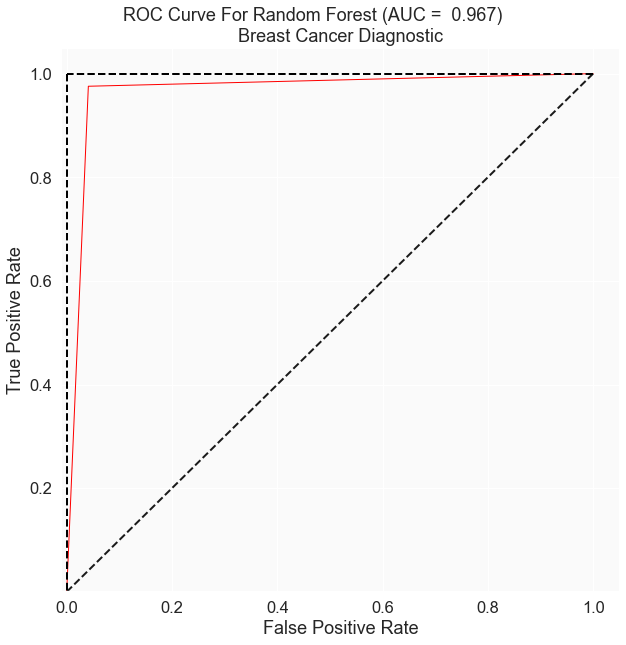

In [61]:
plot_roc_curve(fpr2, tpr2, auc_rf, 'rf',
           xlim=(-0.01, 1.05),
           ylim=(0.001, 1.05))

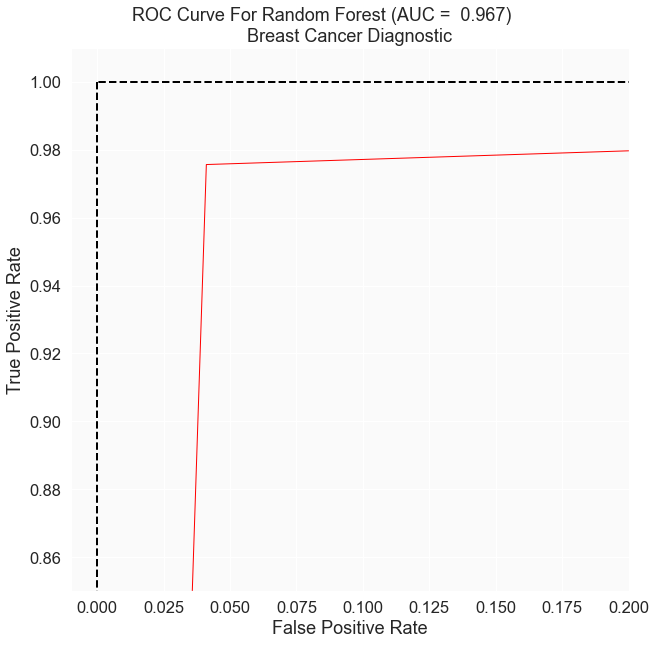

In [62]:
plot_roc_curve(fpr2, tpr2, auc_rf, 'rf',
               xlim=(-0.01, 0.2),
               ylim=(0.85, 1.01))

Classification Report

In [63]:
def print_class_report(predictions, alg_name): 
    print('Classification Report for {0}:'.format(alg_name))
    print(classification_report(predictions,
            test_class_set,
            target_names = dx))

In [64]:
class_report = print_class_report(predictions_rf, 'Random Forest')

Classification Report for Random Forest:
              precision    recall  f1-score   support

      Benign       0.99      0.96      0.97        73
   Malignant       0.93      0.98      0.95        41

    accuracy                           0.96       114
   macro avg       0.96      0.97      0.96       114
weighted avg       0.97      0.96      0.97       114

